# Ch06. 타이타닉 원시(raw) 데이터 요약하기

## 1. 피벗테이블을 만드는 이유

**피벗 테이블(pivot table)**

엑셀에서는 vlookup과 더불어 가장 유용한 기능

유용한 함수가 많은 판다스에서는 여러 유용한 함수들 중 하나인 위치

→ 원시데이터(raw data)를 그룹화해서 집계하는 테이블

**원시 데이터(raw data)와 피벗 테이블의 장단점**

<img src=https://i.ibb.co/0KLb1Qk/06-01-01.jpg, width=600>

**피벗 테이블에 집계함수가 필요한 이유**

<img src=https://i.ibb.co/hm96M6t/06-01-02.jpg, width=600>

강승주씨와 권보아씨 두명의 점수가 A반 여자 한칸에 모두 들어가야 하기에 그룹의 값을 하나로 리턴해주는 집계함수가 필요하다

**pivot_table 함수의 주요 인자**

<img src=https://i.ibb.co/TrVwngR/06-01-03.jpg, width=600>

**pivot 함수가 필요한 이유**

<img src=https://i.ibb.co/dWmXvD5/06-01-04.jpg, width=600>

pivot_table 함수와 달리 pivot 함수는 집계함수가 필요없어서 문자열 피버팅 함수이 가벼운 코드로 가능하다

단, 집계함수를 사용할 수 없으니 pivot 함수를 쓰려면 그룹의 값을 하나로 리턴시킬 필요가 없어야 한다

(모든 그룹의 구성원이 0 또는 1)

## 2. 피벗테이블 만들기 (pivot_table & pivot)

> pandas pivot_table


<img src=https://i.ibb.co/kht5G5v/06-02.png, width=600>



원시(raw) 데이터를 피벗 테이블로 바꾸는 함수


**values**

집계할 대상 열



**index** (열, 또는 grouper)

values에 지정된 열을 그룹화할 기준. 피벗테이블의 index에서 그룹을 구분한다



**columns** (열, 또는 grouper)

values에 지정된 열을 그룹화할 기준. 피벗테이블의 columns에서 그룹을 구분한다



**aggfunc** (집계 함수)

그룹의 차원을 축소시킬 함수

<br><br>

pivot_table 함수 설명 : https://kimpanda.tistory.com/89

pivot_table 함수 공식문서 : https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [ ]:
# 실습 준비 코드
import pandas as pd
pd.options.display.float_format = '{:.1f}'.format # 소수점 출력옵션
data = [['김판다', '남', 'A', 97, '1등', '수시'],
        ['강승주', '여', 'A', 88, '2등', '정시'],
        ['권보아', '여', 'A', 78, '3등', '정시'],
        ['이예준', '여', 'B', 64, '3등', '수시'],
        ['박효신', '남', 'B', 84, '2등', '수시'],
        ['송중기', '남', 'B', 89, '1등', '수시'],
        ['김나현', '여', 'C', 87, '3등', '정시'],
        ['장범준', '남', 'C', 92, '2등', '정시'],
        ['안지영', '여', 'C', 99, '1등', '수시']]
col1 = ['이름', '성별', '반', '점수', '반등수', '비고']
df = pd.DataFrame(data, columns=col1)
df

,이름,성별,반,점수,반등수,비고
0,김판다,남,A,97,1등,수시
1,강승주,여,A,88,2등,정시
2,권보아,여,A,78,3등,정시
3,이예준,여,B,64,3등,수시
4,박효신,남,B,84,2등,수시
5,송중기,남,B,89,1등,수시
6,김나현,여,C,87,3등,정시
7,장범준,남,C,92,2등,정시
8,안지영,여,C,99,1등,수시


In [ ]:
# 반과 성별로 나누어 점수의 평균 구하기
df.pivot_table('점수', index='반', columns='성별', aggfunc='mean')

성별,남,여
반,,
A,97.0,83.0
B,86.5,64.0
C,92.0,93.0


In [ ]:
# aggfunc의 'mean'은 기본값이다
df.pivot_table('점수', index='반', columns='성별')

성별,남,여
반,,
A,97.0,83.0
B,86.5,64.0
C,92.0,93.0


In [ ]:
# 반과 남녀 / 비고로 나눠서 평균점수 구하기
df.pivot_table('점수', index=['반', '성별'], columns='비고')

비고     수시   정시
반 성별          
A 남  97.0  NaN
  여   NaN 83.0
B 남  86.5  NaN
  여  64.0  NaN
C 남   NaN 92.0
  여  99.0 87.0

In [ ]:
# 반 / 성별과 비고로 나눠서 평균점수 구하기
df.pivot_table('점수', index='반', columns=['성별', '비고'])

성별    남         여     
비고   수시   정시   수시   정시
반                     
A  97.0  NaN  NaN 83.0
B  86.5  NaN 64.0  NaN
C   NaN 92.0 99.0 87.0

In [ ]:
# 반 / 성별과 비고로 나눠서 인원수 구하기
df.pivot_table('점수', index='반', columns=['성별', '비고'], aggfunc='count')

성별   남       여    
비고  수시  정시  수시  정시
반                 
A  1.0 NaN NaN 2.0
B  2.0 NaN 1.0 NaN
C  NaN 1.0 1.0 1.0

In [ ]:
# 반과 성별로 나누어 평균점수와 인원수 동시에 구하기
df.pivot_table('점수', index='반', columns='성별', aggfunc=['mean', 'count'])

mean      count   
성별    남    여     남  여
반                    
A  97.0 83.0     1  2
B  86.5 64.0     2  1
C  92.0 93.0     1  2

**aggfunc에 함수를 입력할 때 정확한 표기법은?**

- 원칙적으로 함수명을 입력해야 한다
 (ex. `sum`의 경우 `sum`도 시리즈에 적용되는 함수 명이다)

- 함수명이 길고 자주 쓰이는 함수의 경우 문자열로 입력 가능하도록 정의되어 있다

 (ex. `mean`의 경우 `pd.Series.mean`을 입력해야 하는데 편의상 'mean'을 입력 가능하도록 정의되어 있다.)



```python
s = pd.Series([1, 2])
```




```python
sum(s) # 3 반환
s.sum() # 3 반환
```

윗 코드는 모두 가능하고 `sum`은 함수로도 가능하고 메서드로도 가능하다
함수명인 `sum`을 `aggfunc`에 입력할 수 있다


```python
mean(s) # NameError: name 'mean' is not defined
s.mean() # 1.5 반환
```

`mean`은 메서드의 형태이지 함수명이 아니다
`aggfunc`에 입력될 수 없다


```python
pd.Series.mean(s) # 1.5 반환
```

함수명은 `pd.Series.mean`이므로 `aggfunc=pd.Series.mean` 을 입력해야 한다


다만 mean 같은 함수는 자주 쓰이므로
`aggfunc='mean'` 으로 사용할 수 있도록 특정 문자열('mean')을 입력할 때 적용될 함수(`pd.Seris.mean`)를 정의해 둔 것이다


자주 쓰이는 함수는 문자열로 정의되어 있으므로 먼저 문자열로 함수를 입력해보고 에러가 난다면 메서드가 아닌 함수명을 찾아서 입력하자


- 일반적으로 메서드로 사용하는 함수 (ex. `count` 같은 경우 `pd.Series.count` 라고 입력하면 함수명일 경우가 많다.

- 위의 모든 과정으로 해결이 안된다면 판다스 공식문서에서 함수명을 검색해보자




**`pivot` 함수로 피버팅하기**

In [ ]:
# pivot 함수는 집계함수가 필요 없으므로 문자열을 피벗팅하기에 편리하다
df.pivot(values='이름', index='반', columns='반등수')

반등수,1등,2등,3등
반,,,
A,김판다,강승주,권보아
B,송중기,박효신,이예준
C,안지영,장범준,김나현


피벗 테이블에 대한 추가적인 공부가 필요하다면 참고할 링크

https://youtu.be/6KO0F1NJlmc

## 3. 결측값 삭제하기 (dropna)

**타이타닉호 침몰 사건**

<img src=https://i.ibb.co/CKVQcBk/06-03.jpg, width=400>

타이타닉호는 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선이다. 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰하였다. 타이타닉이 완전히 침몰한 시간은 새벽 2시 20분이다. 타이타닉의 침몰로 1,514명이 사망하였다.

타이타닉호는 첫 항해 당시 세계에서 가장 큰 배 중 하나였다.승객 대다수는 영국과 스칸다나비아 반도 등에서 새로운 삶을 찾아 미국으로 가는 이민자들이었다. 출항 당시 승선 인원은 2,223명이었다.

타이타닉호는 선내에 체육관과 수영장, 그 외의 호화로운 시설을 갖추고 있었다. 그러나 느슨한 규제로 구명정은 20척 밖에 없었다. 구명정 20척의 최대 정원은 1,178명이었다. 1912년 4월 14일 오후 11시 40분(선내 시각, GMT -3) 빙산과 충돌하였고, 이 때문에 주갑판이 함몰되고 우현에 구멍이 났다. 구멍으로 물이 들어오기 시작한 지 2시간 40분만에 완전히 침수되어 침몰하였다. 타이타닉호는 방수용 격벽이 설계되어 있었고 문들도 물을 차단할 수 있도록 설계되었으나 실제 사고에선 역부족이었다. 구명정에 타지 못한 채 바다로 뛰어든 수많은 사람들은 수 분 내에 저체온증으로 사망하였다. 침몰 당시에도 배에 1,000여명의 사람들이 남아 있었다. 구명정을 타고 있다가 몇 시간 뒤 RMS 카르파티아(RMS Carpathia)로 구조된 사람은 706명에 불과하였다.


[타이타닉 위키 링크](https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89)

<br><br>


**영화 타이타닉**

<img src=https://i.ibb.co/9WVBW8B/06-03.png, width=400>

위 사건을 모티브로 만들어진 동명의 영화. 레오나르도 디카프리오와 케이트 윈슬렛이 주연이다. 제70회 아카데미상에서 전체 17개 중 남우주연상, 남우조연상, 각본상을 제외한 14개 부문에 노미네이트돼, 11개 부문 수상으로 역대 최다 관왕을 기록했다



**실습에 쓰일 titanic 생존자 통계 csv 파일 경로**


https://raw.githubusercontent.com/panda-kim/csv_files/main/titanic.csv

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.float_format = '{:.1f}'.format # 소수점 출력옵션
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/titanic.csv'
df_ex1 = pd.read_csv(url)
df_ex1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.3,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.8,NaN,Q


df_ex1은 필요한 열만 가져오고 NaN인 행을 삭제하는 전처리 과정이 필요하다

In [ ]:
df_ex1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# 필요한 열만 인덱싱해서 변수 df_ex2로 선언하자
df_ex2 = df_ex1.iloc[:, [1, 2, 4, 5, 9]].copy()
df_ex2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2
1,1,1,female,38.0,71.3
2,1,3,female,26.0,7.9
...,...,...,...,...,...
888,0,3,female,NaN,23.4
889,1,1,male,26.0,30.0
890,0,3,male,32.0,7.8


In [ ]:
# info 함수로 null 여부를 확인할 수 있다
df_ex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


NaN이 있는 행을 삭제하자

In [ ]:
# NaN은 NaN과 같지 않아서 조건문을 비교연산으로 만들 수 없다
import numpy as np
np.nan == np.nan

False

In [ ]:
# NaN 여부를 가리는 함수 isnull (null이 True로 반환된다)
df_ex2['Age'].isnull()

,Age
0,False
1,False
2,False
...,...
888,True
889,False
890,False


In [ ]:
# 불리언 인덱싱으로 가능하다 (NaN이 True이므로 ~(not)을 사용해야 한다)
df_ex2[~df_ex2['Age'].isnull()]

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2
1,1,1,female,38.0,71.3
2,1,3,female,26.0,7.9
...,...,...,...,...,...
887,1,1,female,19.0,30.0
889,1,1,male,26.0,30.0
890,0,3,male,32.0,7.8


하지만 이 과정이 불편한 것도 사실이기에 null이 있는 열이나 행을 삭제하는 dropna 함수를 사용한다

> pandas dropna



<img src=https://i.ibb.co/CKxKw0R/06-03-01.png, width=600>





결측값(null)이 있는 열이나 행을 삭제하는 함수




**axis** (인수는 0 or 1 / 기본값은 0)

열을 삭제할 것인지 행을 삭제할 것인지 지정하는 인자. 기본값은 0이고 행을 삭제한다



**how** (‘any’ or ‘all’ / 기본값은 ‘any’)

NaN을 보유한 열이나 행을 어떻게 삭제할 것인지 결정한다

- ‘any’ : 하나라도 NaN이면 삭제. 기본값

- ‘all’ : 모두 NaN인 열이나 행을 삭제

**subset** (열의 레이블)

삭제할 NaN이 있는 열을 결정하는 인자


<br><br>


dropna 함수 설명 https://kimpanda.tistory.com/91

dropna 판다스 공식문서 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [ ]:
# 간편하게 dropna 함수를 사용해도 된다
df_ex2.dropna()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2
1,1,1,female,38.0,71.3
2,1,3,female,26.0,7.9
...,...,...,...,...,...
887,1,1,female,19.0,30.0
889,1,1,male,26.0,30.0
890,0,3,male,32.0,7.8


## 4. 타이타닉 원시(raw) 데이터 요약하기

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format # 소수점 출력옵션
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/titanic.csv'
df_ex1 = pd.read_csv(url)
df_ex2 = df_ex1.iloc[:, [1, 2, 4, 5, 9]].dropna().copy()
df_ex2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.00,7.25
1,1,1,female,38.00,71.28
2,1,3,female,26.00,7.92
...,...,...,...,...,...
887,1,1,female,19.00,30.00
889,1,1,male,26.00,30.00
890,0,3,male,32.00,7.75


In [ ]:
# 선실등급 / 성별로 인원수 피벗테이블로 만들기
df_ex2.pivot_table('Age', index='Pclass', columns='Sex', aggfunc='count')

Sex,female,male
Pclass,,
1,85,101
2,74,99
3,102,253


<Axes: xlabel='Pclass'>

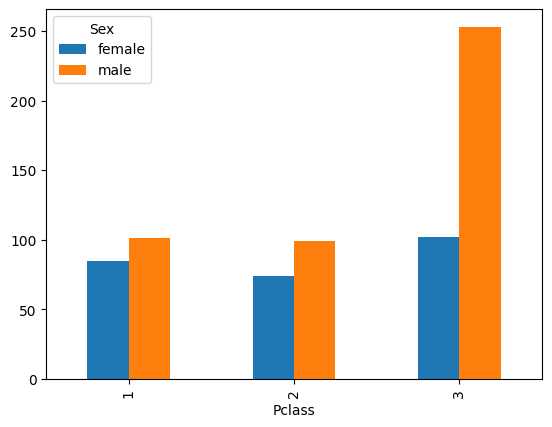

In [ ]:
# 선실등급 / 성별로 인원수 시각화
df_ex2.pivot_table('Age', index='Pclass', columns='Sex', aggfunc='count').plot(kind='bar')

In [ ]:
# 선실등급 / 성별로 평균나이 피벗테이블로 만들기
df_ex2.pivot_table('Age', index='Pclass', columns='Sex')

Sex,female,male
Pclass,,
1,34.61,41.28
2,28.72,30.74
3,21.75,26.51


<Axes: xlabel='Pclass'>

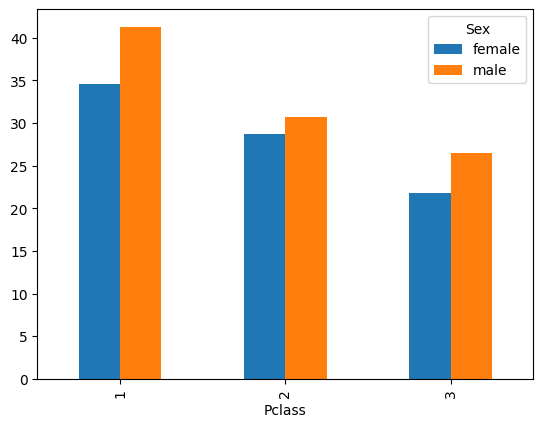

In [ ]:
# 선실등급 / 성별로 평균나이 시각화
df_ex2.pivot_table('Age', index='Pclass', columns='Sex').plot(kind='bar')

In [ ]:
# 선실등급 / 성별로 평균운임 피벗테이블로 만들기
df_ex2.pivot_table('Fare', index='Pclass', columns='Sex')

Sex,female,male
Pclass,,
1,107.95,71.14
2,21.95,21.11
3,15.88,12.16


<Axes: xlabel='Pclass'>

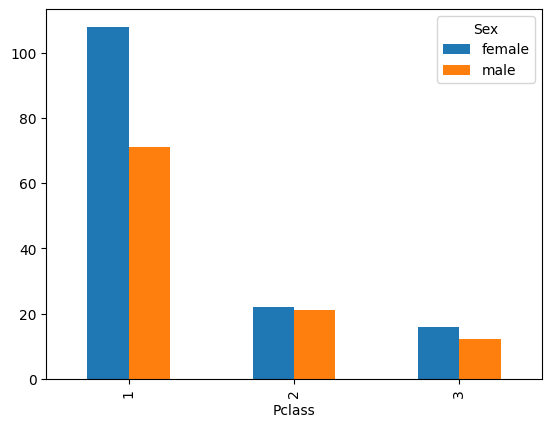

In [ ]:
# 선실등급 / 성별로 평균운임 시각화
df_ex2.pivot_table('Fare', index='Pclass', columns='Sex').plot(kind='bar')

In [ ]:
# 선실등급 / 성별로 생존률 피벗테이블 만들기
df_ex2.pivot_table('Survived', index='Pclass', columns='Sex')

Sex,female,male
Pclass,,
1,0.96,0.40
2,0.92,0.15
3,0.46,0.15


<Axes: xlabel='Pclass'>

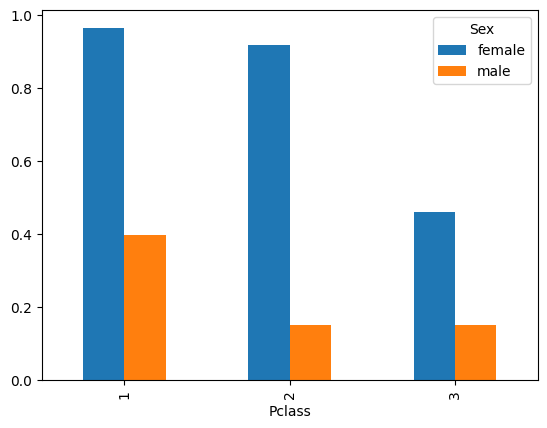

In [ ]:
# 선실등급 / 성별로 생존률 시각화
df_ex2.pivot_table('Survived', index='Pclass', columns='Sex').plot(kind='bar')

## 5. seaborn으로 시각화 하기

**seaborn**
- matplotlib 기반으로 만들어진 시각화 라이브러리
- matplotlib에 비해 코드가 간결하다
- matplotlib에 비해 예쁜 디자인을 만들기 쉽다
- 다양한 통계함수를 적용 가능하다
- matplotlib처럼 기본값으로는 한글을 지원하지 않는다 ([한글 폰트 적용하는 방법](https://kimpanda.tistory.com/93))


seaborn 공식문서 : https://seaborn.pydata.org/index.html

색상(palette) : https://seaborn.pydata.org/generated/seaborn.color_palette.html

색상(matplotlib의 colormap) : https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
# 프로젝트 코드
import pandas as pd
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format # 소수점 출력옵션
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/titanic.csv'
df_ex1 = pd.read_csv(url)
df_ex2 = df_ex1.iloc[:, [1, 2, 4, 5, 9]].dropna().copy()
df_ex2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.00,7.25
1,1,1,female,38.00,71.28
2,1,3,female,26.00,7.92
...,...,...,...,...,...
887,1,1,female,19.00,30.00
889,1,1,male,26.00,30.00
890,0,3,male,32.00,7.75


**countplot** : seaborn에서 count를 집계함수로 그래프를 그리는 함수

주요 인자(parameter) → data, x or y, palette : 색상, hue: 그룹, ax: axes

공식 문서 : https://seaborn.pydata.org/generated/seaborn.countplot.html

<Axes: xlabel='Pclass', ylabel='count'>

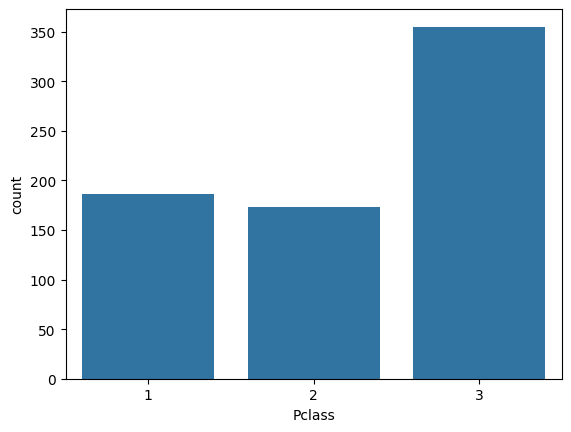

In [ ]:
# 선실 등급/ 인원수 그래프 그리기
sns.countplot(data=df_ex2, x='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

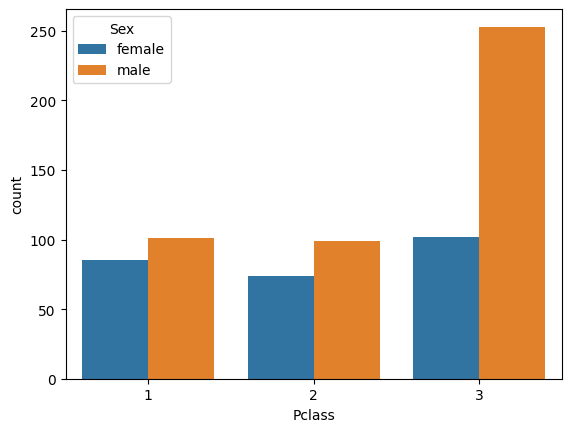

In [ ]:
# 선실 등급/ 인원수를 성별로 그룹을 나눠서 그래프 그리기
sns.countplot(data=df_ex2, x='Pclass', hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

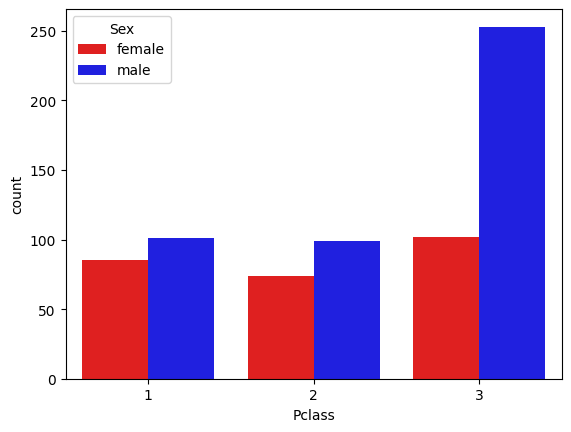

In [ ]:
# 색깔지정
sns.countplot(data=df_ex2, x='Pclass', hue='Sex', palette=['red', 'blue'])

<Axes: xlabel='Pclass', ylabel='count'>

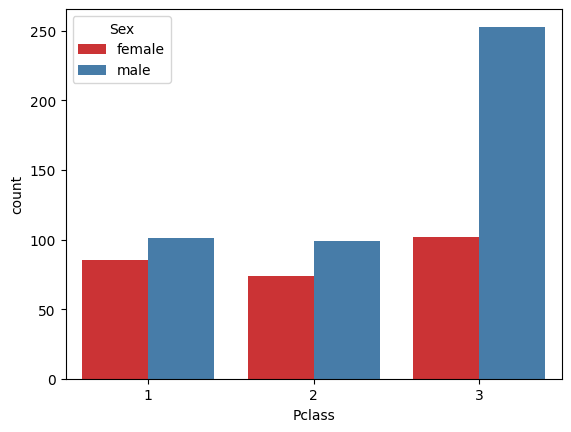

In [ ]:
# 지정된 palette들을 사용해 색깔 지정
sns.countplot(data=df_ex2, x='Pclass', hue='Sex', palette='Set1')

<Axes: xlabel='Pclass'>

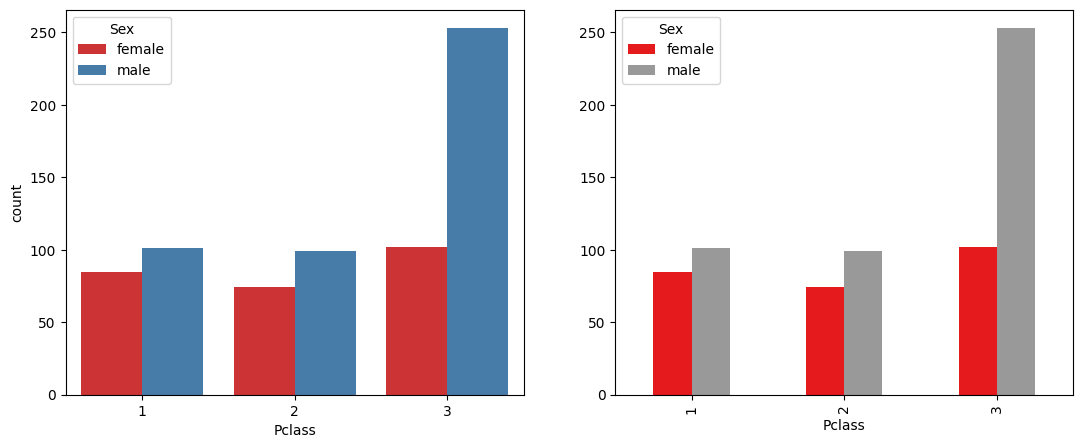

In [ ]:
# 판다스 plot 함수와 seaborn의 비교
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, figsize=(13, 5))
sns.countplot(data=df_ex2, x='Pclass', hue='Sex', palette='Set1', ax=ax[0])

(df_ex2
 .pivot_table('Age', index='Pclass', columns='Sex', aggfunc='count')
 .plot(kind='bar', ax=ax[1], colormap='Set1'))

**barplot** : seaborn에서 막대그래프를 그리는 함수. 기본값으로 평균으로 집계한다

주요 인자(parameter) → data, x, y, palette : 색상, hue: 그룹, ax: axes, estimator: 집계함수

공식문서 : https://seaborn.pydata.org/generated/seaborn.barplot.html

<ipython-input-32-cb2add7d09e9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df_ex2, x='Pclass', y='Age', hue='Sex', ci=False,


<Axes: xlabel='Pclass', ylabel='Age'>

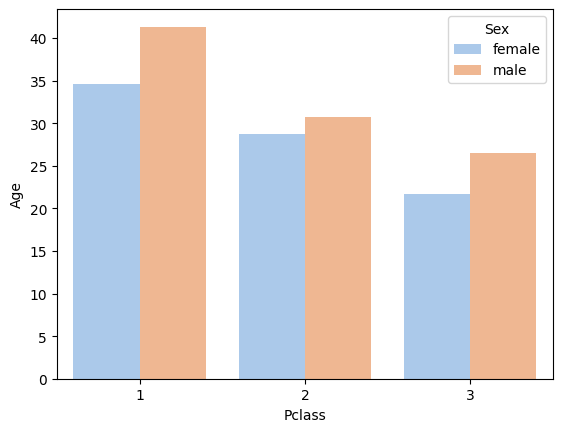

In [ ]:
# 선실등급별 /평균 나이를 남녀를 그룹으로 나눠서 그래프 그리기
sns.barplot(data=df_ex2, x='Pclass', y='Age', hue='Sex', ci=False,
            palette='pastel')

<ipython-input-33-6420d21d86de>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df_ex2, x='Pclass', y='Fare', hue='Sex', ci=False,


<Axes: xlabel='Pclass', ylabel='Fare'>

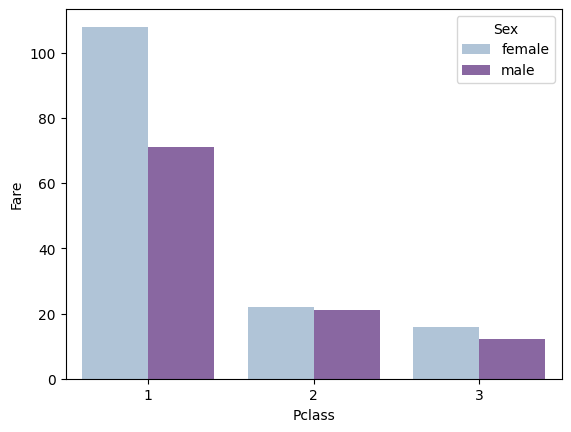

In [ ]:
# 선실등급별 / 평균 운임 남녀를 그룹으로 나눠서 그래프 그리기
sns.barplot(data=df_ex2, x='Pclass', y='Fare', hue='Sex', ci=False,
            palette='BuPu')

<ipython-input-34-9ce65a88106f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df_ex2, x='Pclass', y='Fare', hue='Sex', ci=False,


<Axes: xlabel='Pclass', ylabel='Fare'>

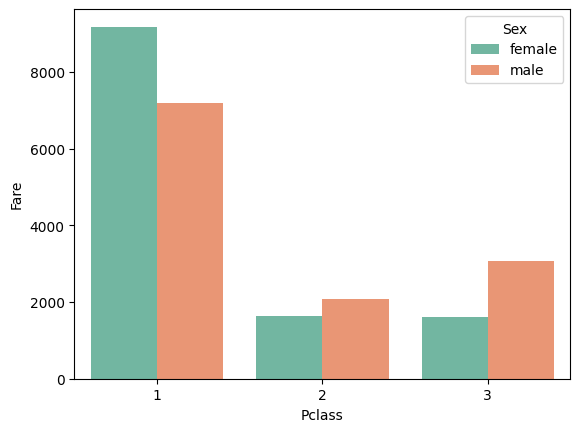

In [ ]:
# 선실등급별 / 총 운임을 남녀를 그룹으로 나눠서 그래프 그리기
sns.barplot(data=df_ex2, x='Pclass', y='Fare', hue='Sex', ci=False,
            palette='Set2', estimator=sum)

<ipython-input-35-e8da17af0725>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df_ex2, x='Pclass', y='Survived', hue='Sex', ci=False,


<Axes: xlabel='Pclass', ylabel='Survived'>

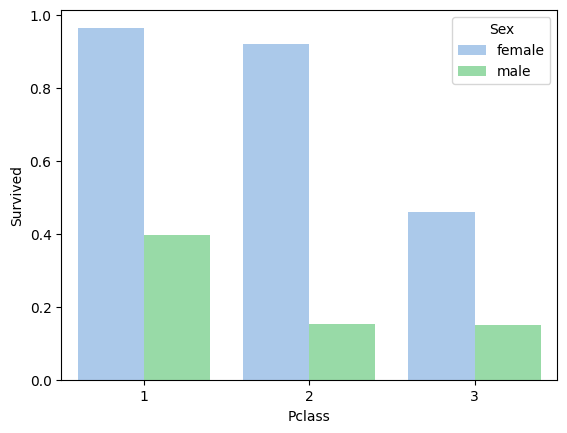

In [ ]:
# 선실등급별 / 생존률 남녀를 그룹으로 나눠서 그래프 그리기
sns.barplot(data=df_ex2, x='Pclass', y='Survived', hue='Sex',
            palette='pastel6')

<ipython-input-36-b228c6a1dee2>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_ex2, palette='Set1', ax=ax[1], ci=False)


[Text(0, 0.5, ''), Text(0.5, 1.0, 'Survival rate')]

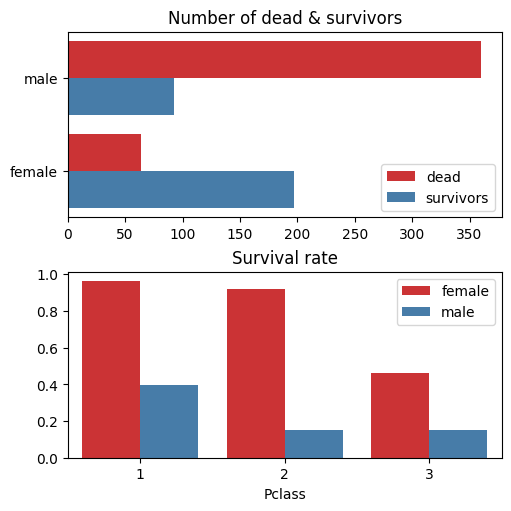

In [ ]:
# 최종 그래프
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, figsize=(5, 5), constrained_layout=True)

sns.countplot(y='Sex', data=df_ex2, hue='Survived', palette='Set1', ax=ax[0])
ax[0].legend(title='', loc='best', labels=['dead', 'survivors'])
ax[0].set(xlabel='', ylabel='', title='Number of dead & survivors')


sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_ex2, palette='Set1', ax=ax[1])
ax[1].legend(title='', loc='upper right')
ax[1].set(ylabel='',title='Survival rate')

## 6. 맞춤형 피벗테이블 만들기

In [ ]:
# 프로젝트 코드
import pandas as pd
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format # 소수점 출력옵션
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/titanic.csv'
df_ex1 = pd.read_csv(url)
df_ex2 = df_ex1.iloc[:, [1, 2, 4, 5, 9]].dropna().copy()
df_ex2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.00,7.25
1,1,1,female,38.00,71.28
2,1,3,female,26.00,7.92
...,...,...,...,...,...
887,1,1,female,19.00,30.00
889,1,1,male,26.00,30.00
890,0,3,male,32.00,7.75


<Axes: xlabel='Age', ylabel='Count'>

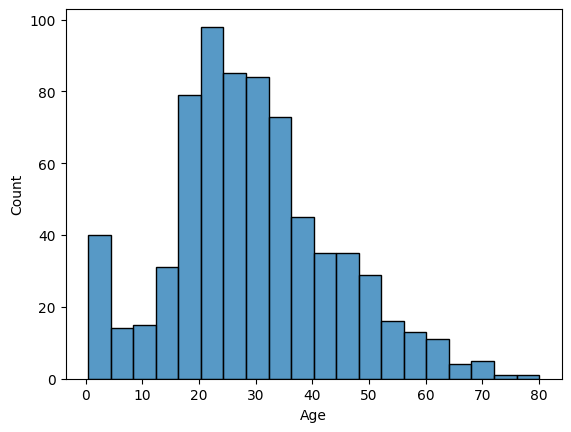

In [ ]:
# 나이 분포 확인하기
sns.histplot(df_ex2['Age'])

In [ ]:
# 15세 이하의 생존율 만들기
cond1 = df_ex2['Age'] <= 15
df_ex2[cond1].pivot_table('Survived', index='Pclass')

,Survived
Pclass,
1,0.83
2,1.00
3,0.43


In [ ]:
# 15세 초과의 생존율 만들기
df_ex2[~cond1].pivot_table('Survived', index='Pclass')

,Survived
Pclass,
1,0.65
2,0.42
3,0.20


In [ ]:
# 15세 이하를 child로 15세 초과를 adult로 구분한 열 만들기(원본 보존)
df_ex3 = df_ex2.copy()
df_ex3['A or C'] = df_ex3['Age'].mask(cond1, 'child').mask(~cond1, 'adult')
df_ex3

,Survived,Pclass,Sex,Age,Fare,A or C
0,0,3,male,22.00,7.25,adult
1,1,1,female,38.00,71.28,adult
2,1,3,female,26.00,7.92,adult
...,...,...,...,...,...,...
887,1,1,female,19.00,30.00,adult
889,1,1,male,26.00,30.00,adult
890,0,3,male,32.00,7.75,adult


mask 함수에 대한 복습이 필요하다면

mask 함수 설명 : https://kimpanda.tistory.com/82

mask 공식 문서 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html

In [ ]:
# adult와 child의 생존율 비교
df_ex3.pivot_table('Survived', index='Pclass', columns='A or C')

A or C,adult,child
Pclass,,
1,0.65,0.83
2,0.42,1.00
3,0.20,0.43


## 7. seaborn 및 피벗테이블에 lambda함수 적용하기

In [ ]:
# 프로젝트 코드
import pandas as pd
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format # 소수점 출력옵션
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/titanic.csv'
df_ex1 = pd.read_csv(url)
df_ex2 = df_ex1.iloc[:, [1, 2, 4, 5, 9]].dropna().copy()

df_ex3 = df_ex2.copy()
cond1 = df_ex3['Age'] <= 15
df_ex3['A or C'] = df_ex3['Age'].mask(cond1, 'child').mask(~cond1, 'adult')

# idxmax 함수의 필요성을 위한 예제 df
df = pd.DataFrame([[22, '김판다'], [17, '강승주'], [18, '송중기']],
                  columns=['Age', 'Name'])

In [ ]:
# idxmax 함수의 필요성을 위한 예제 df 출력
df

,Age,Name
0,22,김판다
1,17,강승주
2,18,송중기


In [ ]:
# 가장 나이가 많은 사람 이름 추출하는 함수
x = df['Age']
df.loc[x.idxmax(), 'Name']

'김판다'

선실 등급별 최고령자의 이름을 피벗테이블로 만들자

In [ ]:
df_ex1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


In [ ]:
df_ex1.pivot_table('Age', index='Pclass', columns='Sex',
                   aggfunc=lambda x: df_ex1.loc[x.idxmax(), 'Name'])

Sex,female,male
Pclass,,
1,"Andrews, Miss. Kornelia Theodosia","Barkworth, Mr. Algernon Henry Wilson"
2,"Mack, Mrs. (Mary)","Mitchell, Mr. Henry Michael"
3,"Turkula, Mrs. (Hedwig)","Svensson, Mr. Johan"


15세 이하의 인원수를 피벗테이블로 만들자

In [ ]:
# 15세 이하의 인원수를 불리언 인덱싱으로 구하기
cond1 = df_ex3['Age'] <= 15
df_ex3[cond1].pivot_table('Age', index='Pclass', columns='Sex', aggfunc='count')

Sex,female,male
Pclass,,
1,3,3
2,10,9
3,30,28


In [ ]:
# 시리즈에서 15보다 같거나 작은 개수를 파악하는 lambda 함수 만들기
x = pd.Series([16, 17, 13, 15])
(x <= 15).sum()

2

In [ ]:
# 15세 이하의 인원수를 lambda 함수로도 파악할 수 있다
df_ex3.pivot_table('Age', index='Pclass', columns='Sex',
                   aggfunc=lambda x: (x <= 15).sum())

Sex,female,male
Pclass,,
1,3,3
2,10,9
3,30,28


15세 이하의 인원수를 피벗테이블로 만들자

In [ ]:
# 15세 이하의 인원수의 비율을 가져올 lambda 함수 만들기
x = pd.Series([16, 17, 13, 15])
(x <= 15).mean()

0.5

In [ ]:
# 15세 이하의 비율
df_ex3.pivot_table('Age', index='Pclass', aggfunc=lambda x: (x <= 15).mean())

,Age
Pclass,
1,0.03
2,0.11
3,0.16


각 선실등급별 15세 이하의 비율과 아이와 어른의 생존율을 비교하는 그래프를 그리자

<ipython-input-53-286af27060e9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df_ex3, x='Pclass', y='Age',
<ipython-input-53-286af27060e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ex3, x='Pclass', y='Age',
<ipython-input-53-286af27060e9>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df_ex3, x='Pclass', y='Survived', hue='A or C',


<Axes: xlabel='Pclass', ylabel='Age'>

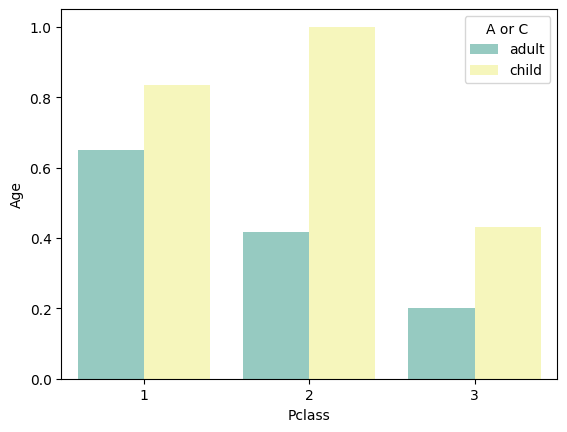

In [ ]:
# 15세 이하의 비율 그래프
sns.barplot(data=df_ex3, x='Pclass', y='Age',
            estimator=lambda x: (x <= 15).mean(), palette='BuPu')

# 아이와 어른의 생존율 비교 그래프
sns.barplot(data=df_ex3, x='Pclass', y='Survived', hue='A or C',
            ci=False, palette='Set3')

**타이타닉호는 과연 아이와 여성부터 구조했을까?**

해당 내용을 검토할 수 있는 그래프를 4개 모아서 그리자

1. 남녀별 생존자수와 사망자수
2. 객실등급별 남녀의 생존율 비교
3. 객실등급별 아이(15세이하)의 비율 그래프
4. 객실 등급별 어른과 아이의 생존율 비교

모두 이제까지 만들었던 그래프들이다

<ipython-input-54-b9252433c9ab>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_ex3, palette='Set2',
<ipython-input-54-b9252433c9ab>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Pclass', y='Age', data=df_ex3, palette='RdPu_r',
<ipython-input-54-b9252433c9ab>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Age', data=df_ex3, palette='RdPu_r',
<ipython-input-54-b9252433c9ab>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df_ex3, palette='Set3',


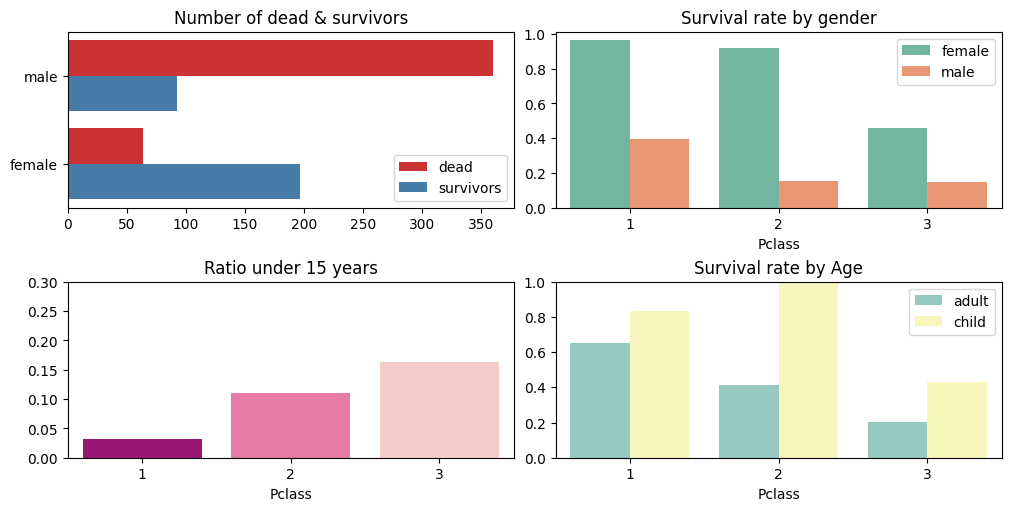

In [ ]:
# 타이타닉 생존 분석 결과
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), constrained_layout=True)

sns.countplot(y='Sex', data=df_ex3, hue='Survived', palette='Set1', ax=ax[0][0])
ax[0][0].legend(title='', labels=['dead', 'survivors'])
ax[0][0].set(xlabel='', ylabel='', title='Number of dead & survivors')

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_ex3, palette='Set2',
            ax=ax[0][1])
ax[0][1].legend(title='')
ax[0][1].set(ylabel='', title='Survival rate by gender')

sns.barplot(x='Pclass', y='Age', data=df_ex3, palette='RdPu_r',
            ax=ax[1][0], estimator=lambda x: (x <= 15).mean())
ax[1][0].set(ylim=(0, 0.3), ylabel='', title='Ratio under 15 years')
sns.barplot(x='Pclass', y='Survived', data=df_ex3, palette='Set3',
            ci=False, ax=ax[1][1], hue='A or C')
ax[1][1].set(ylim=(0, 1),  ylabel='', title='Survival rate by Age')
ax[1][1].legend(title='', loc='upper right')